# PerkinsHacks + BostonHacks

<center> <img src="https://bostonhacks.io/public/img/terrierLogo.png" style="width: 300px;" /> </center>

## Comparative study in Neural Networks

Train a Fully-Connected Neural Network, Simple Convolutional Neural Network and Large Convolutional Neural Network using the MNIST dataset (handwritten digits)


### Loading the MNIST dataset in Keras

Plot ad hoc mnist instances

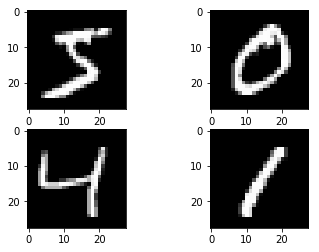

In [32]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap = plt.get_cmap('gray'))

# show the plot
plt.show()

## Baseline Model with Multi-Layer Perceptrons

### Complete all imports 

In [33]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

#### Fix random seed for reproducibility

In [34]:
seed = 7
np.random.seed(seed)

### Load data and transform it as the input of a Fully-Connected Neural Network

That is, <br />
The shape of the input data is currently a 28x28 pixel image but <br />
Fully-Connected Neural Network needs one row input per data point <br /><br />
So, we transform the 28x28 image to a 784 vector for each image

In [35]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#### Normalize

In [36]:
# It is almost always a good idea to perform some scaling
#  of input values when using neural network models.
# Because the scale is well known and well behaved.
# Reduces extreme values (extreme values can lead to mis-classification).

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Define the model for the Fully-Connected Neural Network

In [37]:
# define baseline model
def baseline_fcnn_model():
    
    # Models in Keras can come in two forms – Sequential and via the Functional API.
    
    # For most deep learning networks that people build,
    #  the Sequential model is likely what isl used.
    
    # It allows us to easily stack layers (and even recurrent layers)
    #  of the network in order from input to output.
    
    # The functional API allows us to build more complicated architectures,
    #  but for this workshop we won't be needing it.
    
    # create model
    model = Sequential()
    
    # Add a fc layer which takes input of num_pixels (784) defined previously
    # This layer also has an output of 'num_pixels' features, defined by 'units'
    # Follow this layer's neurons with a ReLU activation
    model.add(Dense(units = num_pixels, input_dim = num_pixels, activation = 'relu'))
    
    # Add a fc layer which takes input from the previous layer
    # This layer also has an output of 'num_classes' features, defined by 'units'
    # Follow this layer's neurons with a softmax activation
    #  to get probability predictions
    model.add(Dense(units = num_classes, activation = 'softmax'))
    
    # Compile model, same as initializing model and allocating space to the model
    model.compile(loss='categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    
    return model

### Finally, the train and test the model and print a classification error rate

In [38]:
# build the model
model = baseline_fcnn_model()

# train the model
model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          epochs = 10, batch_size = 200)

# evaluate of the model, return (accuracy, loss)
scores = model.evaluate(X_test, y_test, verbose=0)

print("Baseline FCNN Error: %.2f%%" % (100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.2785 - acc: 0.9209 - val_loss: 0.1416 - val_acc: 0.9588
Epoch 2/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.1126 - acc: 0.9668 - val_loss: 0.0913 - val_acc: 0.9712
Epoch 3/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0725 - acc: 0.9794 - val_loss: 0.0801 - val_acc: 0.9764
Epoch 4/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0513 - acc: 0.9848 - val_loss: 0.0742 - val_acc: 0.9779
Epoch 5/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0378 - acc: 0.9894 - val_loss: 0.0640 - val_acc: 0.9806
Epoch 6/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0276 - acc: 0.9925 - val_loss: 0.0655 - val_acc: 0.9795
Epoch 7/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0224 - acc: 0.9939 - val_loss: 0.0634 - 

## Simple Convolutional Neural Network

In [49]:
q=model.predict(X_test[:])

In [55]:
q[0].round()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.], dtype=float32)

In [59]:
y_test[:]-q.round()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Complete all imports 

In [60]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

#### Fix random seed for reproducibility

In [61]:
seed = 7
np.random.seed(seed)

### Load data and transform it as the input of a Convolutional Neural Network 

That is, <br />
The shape of the input data is currently a 28x28 pixel image but <br />
Convolutional Neural Network needs to know the number of channels, i.e. RGB has 3 channels, greyscale has 1,<br /><br />
So, we transform the 28x28 image to a (height, width, channels) vector for each image. <br /><br />
Note: (height, width, channels) dimension ordering applies to tensorflow or tf. <br />
Keras also supports Theano where the ordering has to be (channels, height, width)

In [62]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][height][width][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

#### Normalize

In [63]:
# Normalize input as before

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Define the model for the Simple Convolutional Neural Network

In [64]:
# define baseline model
def baseline_cnn_model():
    
    # create model
    model = Sequential()
    
    # Add a conv layer which takes input of (28, 28, 1) defined previously
    #  does a convolution over a 5x5 kernel window
    # This layer also has an output of 32 features, defined by 'filters'
    # Follow this layer's neurons with a ReLU activation
    model.add(Conv2D(filters = 32, kernel_size = (5, 5),
                     input_shape = (28, 28, 1), activation = 'relu'))
    
    # Add a maxpooling of 2x2, i.e. maxpool width by 2 and height by 2
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    # Add a dropout, this helps us overcome overfitting
    # Dropout randomly changes x% of data input with 0's 
    # In this case, 20%
    model.add(Dropout(0.2))
    
    # Recall how we talked about the input of a fc layer,
    #  it cannot be a matrix and but has to be single row per data point
    #  so we flatten the matrix output of a conv layer
    #  or maxpooling layer into one row
    model.add(Flatten())
    
    # Add a fc layer which takes input from the previous layer
    # This layer also has an output of 128 features, defined by 'filters'
    # Follow this layer's neurons with a ReLU activation
    model.add(Dense(units = 128, activation='relu'))
    
    # Add a fc layer which takes input from the previous layer
    # This layer also has an output of 'num_classes' features, defined by 'units'
    # Follow this layer's neurons with a softmax activation
    #  to get probability predictions
    model.add(Dense(units = num_classes, activation='softmax'))
    
    # Compile model, same as initializing model and allocating space to the model
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    
    return model

### Finally, the train and test the model and print a classification error rate

In [65]:
# build the model
model = baseline_cnn_model()

# train the model
model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          epochs = 10, batch_size = 200)

# evaluate of the model, return (accuracy, loss)
scores = model.evaluate(X_test, y_test, verbose = 0)

print("Baseline CNN Error: %.2f%%" % (100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 48s 802us/step - loss: 0.2233 - acc: 0.9364 - val_loss: 0.0748 - val_acc: 0.9770
Epoch 2/10
60000/60000 [==============================] - 43s 713us/step - loss: 0.0712 - acc: 0.9786 - val_loss: 0.0465 - val_acc: 0.9842
Epoch 3/10
60000/60000 [==============================] - 43s 718us/step - loss: 0.0506 - acc: 0.9845 - val_loss: 0.0422 - val_acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 44s 732us/step - loss: 0.0403 - acc: 0.9873 - val_loss: 0.0387 - val_acc: 0.9869
Epoch 5/10
60000/60000 [==============================] - 46s 764us/step - loss: 0.0319 - acc: 0.9900 - val_loss: 0.0344 - val_acc: 0.9884
Epoch 6/10
60000/60000 [==============================] - 44s 735us/step - loss: 0.0261 - acc: 0.9919 - val_loss: 0.0330 - val_acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 45s 753us/step - loss: 0.0221 - acc: 0.9929 - val_loss: 0.

KeyboardInterrupt: 

## Large Convolutional Neural Network

### Complete all imports 
#### Fix random seed for reproducibility
### Load data and transform it as the input of a Convolutional Neural Network

In [ ]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][height][width][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Define the model for the Fully-Connected Neural Network

In [ ]:
# define baseline model
def larger_model():
    
    # create model
    model = Sequential()
    
    # Add a conv layer which takes input of (28, 28, 1) defined previously
    #  does a convolution over a 5x5 kernel window
    # This layer also has an output of 32 features, defined by 'filters'
    # Follow this layer's neurons with a ReLU activation
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), 
                     input_shape = (28, 28, 1), activation = 'relu'))
    
    # Add a maxpooling of 2x2, i.e. maxpool width by 2 and height by 2
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    # Add a conv layer which takes input from the previous layer
    #  does a convolution over a 3x3 kernel window
    # This layer also has an output of 16 features, defined by 'filters'
    # Follow this layer's neurons with a ReLU activation
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
    
    # Add a maxpooling of 2x2, i.e. maxpool width by 2 and height by 2
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    # Add a dropout, this helps us overcome overfitting
    # Dropout randomly changes x% of data input with 0's 
    # In this case, 20%
    model.add(Dropout(0.2))
    
    # Add a flatten layer
    model.add(Flatten())
    
    # Add a fc layer which takes input from the previous layer
    # This layer also has an output of 128 features, defined by 'filters'
    # Follow this layer's neurons with a ReLU activation
    model.add(Dense(units = 128, activation='relu'))
    
    # Add a fc layer which takes input from the previous layer
    # This layer also has an output of 64 features, defined by 'filters'
    # Follow this layer's neurons with a ReLU activation
    model.add(Dense(units = 64, activation='relu'))
    
    # Add a fc layer which takes input from the previous layer
    # This layer also has an output of 'num_classes' features, defined by 'units'
    # Follow this layer's neurons with a softmax activation
    #  to get probability predictions
    model.add(Dense(units = num_classes, activation = 'softmax'))
    
    # Compile model, same as initializing model and allocating space to the model
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    
    return model


### Finally, the train and test the model and print a classification error rate

In [ ]:
# build the model
model = larger_model()

# train the model
model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          epochs = 10, batch_size = 200)

# evaluate of the model, return (accuracy, loss)
scores = model.evaluate(X_test, y_test, verbose = 0)

print("Large CNN Error: %.2f%%" % (100 - scores[1] * 100))